In [1]:
import sys
import os

# Append the directory of clean_cresci_2015.py to sys.path
sys.path.append(os.path.abspath("../Code"))

# Now you can import clean_cresci_2015
from clean_cresci import clean_cresci_2015, clean_cresci_2017
from import_data import ImportData
from evaluation import Evaluate 
from feature_selection import FeatureSelection
from models_test import ModelTester

## 1.- Clean Data

The following section will clean the dataset, merge and produce new features by merging user info and

In [2]:
# Choose the class for the dataset to clean either 2015 or 2017
# cleaner = clean_cresci_2015()
cleaner = clean_cresci_2017()

# Clean the data
cleaner.clean_data()

Processing datasets in genuine_accounts.csv...


c:\Users\jmanu\OneDrive - University of South Australia\Capstone\GIT\Code\clean_cresci.py:135: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(tweets_path, encoding='utf-8')


Tweets: 2839362 rows, Users: 3474 rows
******FILES SAVED********


Processing datasets in social_spambots_1.csv...


c:\Users\jmanu\OneDrive - University of South Australia\Capstone\GIT\Code\clean_cresci.py:135: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(tweets_path, encoding='utf-8')


Tweets: 1610034 rows, Users: 991 rows
******FILES SAVED********


Processing datasets in social_spambots_2.csv...


c:\Users\jmanu\OneDrive - University of South Australia\Capstone\GIT\Code\clean_cresci.py:135: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(tweets_path, encoding='utf-8')


Tweets: 428542 rows, Users: 3457 rows
******FILES SAVED********


Processing datasets in social_spambots_3.csv...


c:\Users\jmanu\OneDrive - University of South Australia\Capstone\GIT\Code\clean_cresci.py:135: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(tweets_path, encoding='utf-8')


Tweets: 1418557 rows, Users: 464 rows
******FILES SAVED********




## 2.- Import Data

The following section will import the dataset and merge the different folder to a desired ratio of bot to not bot

In [3]:
# Instantiate the importing class
importer = ImportData()

# Select the desired datasetet and ratios to merge 
data = importer.read_and_sample_data(dataset="cresci-2017", bot_ratio=[.2, .8])

# Check if the results make sense
data['bot'].value_counts(normalize=True)

1    0.800046
0    0.199954
Name: bot, dtype: float64

# 3 - Feature Selection

The following section will create three different analysis to select which are the features that influence the predicting variable the most

In [4]:
# Instantiate the selecting class
selection = FeatureSelection(data)

# Create a correlation selection
_, features = selection.correlation()

# View best features in order
features

['num_tweets',
 'account_age_years',
 'id',
 'num_mentions',
 'num_urls',
 'statuses_count',
 'num_hashtags',
 'favourites_count',
 'friends_count',
 'retweet_count',
 'retweet_ratio',
 'favorite_count',
 'listed_count',
 'followers_count',
 'followers_to_friends_ratio']

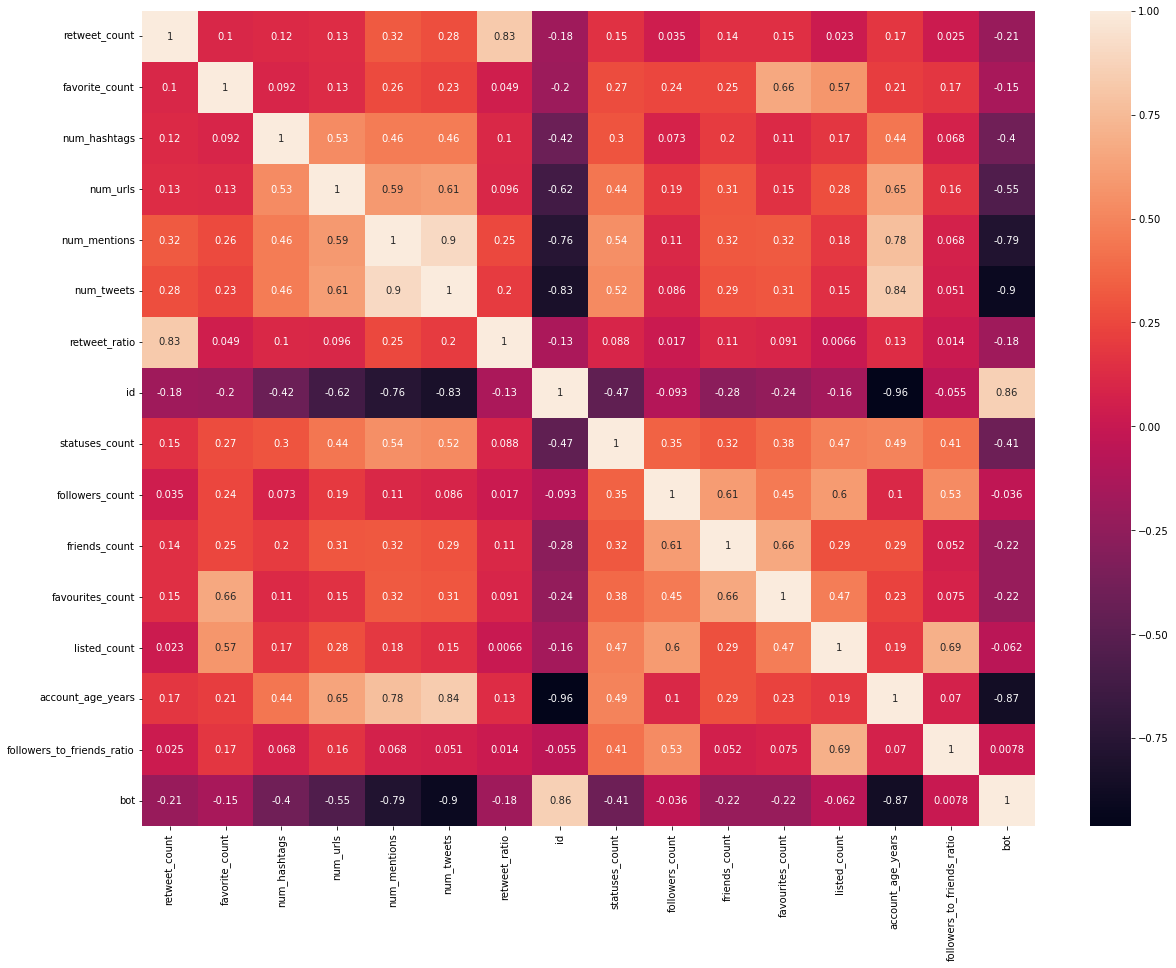

In [5]:
# Create a correlation map 
selection.correlation_map()

# 3.2 Split Data 

The following section uses the Importing Class to create the Training, Test and Validation splits

In [6]:
# Start the function with the desired data to split
splits = importer.split_dataset(data)

# The output will be a dictionary with each of the splits
splits['X_train']

,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,num_tweets,retweet_ratio,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,account_age_years,followers_to_friends_ratio
1116,0.000004,0.000775,0.000657,0.000000,0.004392,0.015918,0.000078,2374128354,0.000114,0.000239,0.002333,0.000000,0.000000,0.000,0.007602
3832,0.000005,0.001809,0.001315,0.000000,0.006241,0.032772,0.000068,2352269714,0.000314,0.000106,0.002517,0.000000,0.000000,0.000,0.003131
1826,0.000000,0.000517,0.000657,0.000000,0.005086,0.017790,0.000000,2360119646,0.000114,0.000212,0.002333,0.000000,0.000000,0.000,0.006757
2098,0.000004,0.002068,0.000877,0.000000,0.001618,0.013109,0.000104,2379928824,0.000130,0.000080,0.002271,0.000000,0.000000,0.000,0.002602
2174,0.000004,0.001551,0.001096,0.000000,0.002080,0.013733,0.000102,2378868756,0.000119,0.000106,0.002149,0.000000,0.000000,0.000,0.003668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,0.000003,0.002585,0.000986,0.000000,0.004623,0.018727,0.000057,2362227691,0.000152,0.000106,0.002210,0.000000,0.000000,0.000,0.003566
1619,0.000002,0.001809,0.000329,0.000000,0.006010,0.018102,0.000043,2384161208,0.000141,0.000027,0.002149,0.000000,0.000000,0.000,0.000917
2921,0.000002,0.001292,0.000877,0.000000,0.004854,0.018414,0.000043,2366699862,0.000200,0.000053,0.002394,0.000000,0.000000,0.000,0.001646
2710,0.000002,0.001551,0.000438,0.000000,0.007397,0.024657,0.000036,2372946696,0.000222,0.000292,0.002517,0.000000,0.000000,0.000,0.008611


# 4.- Sample Model 

The following seacton will take each of the splits and the features in the specified order of importance.  
This allows to create prediction with the desired number of features

In [7]:
# Instantiate the class with the splits and the desired order of importance for the features
tester = ModelTester(splits, features)

Single Model Prediction

In [8]:
# Create a prediction for a specified model 
svm_predictions = tester.predict_model('svm')

c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The 

All Models Predictions

In [9]:
# Create a prediction for all the models and save on a dictionary
predictions = {}
for model in tester.models.keys():
    print(model)
    predictions[model] = tester.predict_model(model)

decision_tree


c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The 

knn


c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The 

logistic_regression
svm


c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\jmanu\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The 

## 5.- Evaluation

The following section will evalaute the prediction across each of the main metrics

Single Model Evaluation

In [10]:
# The following section will evaluate the predictions on the test set
svm_test_evaluation = Evaluate(true_values=splits['y_test'], 
                           predicted_values=svm_predictions['test_predictions'], 
                           predicted_probabilities=svm_predictions['test_probabilities']
                           )
                           
# View the predictions
svm_test_evaluation.get_all_metrics()

{'Accuracy': 0.9783950617283951,
 'TN Rate': 0.19135802469135801,
 'FP Rate': 0.007716049382716049,
 'FN Rate': 0.013888888888888888,
 'TP Rate': 0.7870370370370371,
 'Precision': 0.9902912621359223,
 'Recall': 0.9826589595375722,
 'F1 Score': 0.9864603481624757,
 'MCC': 0.9332000407897656,
 'AUC': 0.993398156860988}

Multiple models evaluation

In [11]:
# Evaluation for the Test set in each of the models
for model in predictions:
    print(model)
    test_evaluation = Evaluate(true_values=splits['y_test'], 
                           predicted_values=predictions[model]['test_predictions'], 
                           predicted_probabilities=predictions[model]['test_probabilities']
                           )

    print(f"{test_evaluation.get_all_metrics()}\n\n")


decision_tree
{'Accuracy': 0.9922839506172839, 'TN Rate': 0.19444444444444445, 'FP Rate': 0.004629629629629629, 'FN Rate': 0.0030864197530864196, 'TP Rate': 0.7978395061728395, 'Precision': 0.9942307692307693, 'Recall': 0.9961464354527938, 'F1 Score': 0.9951876804619827, 'MCC': 0.9757440110140206, 'AUC': 0.997976131797882}


knn
{'Accuracy': 0.9938271604938271, 'TN Rate': 0.19753086419753085, 'FP Rate': 0.0015432098765432098, 'FN Rate': 0.004629629629629629, 'TP Rate': 0.7962962962962963, 'Precision': 0.9980657640232108, 'Recall': 0.9942196531791907, 'F1 Score': 0.9961389961389961, 'MCC': 0.9808000765412263, 'AUC': 0.9939956087287717}


logistic_regression
{'Accuracy': 0.9429012345679012, 'TN Rate': 0.14506172839506173, 'FP Rate': 0.05401234567901234, 'FN Rate': 0.0030864197530864196, 'TP Rate': 0.7978395061728395, 'Precision': 0.9365942028985508, 'Recall': 0.9961464354527938, 'F1 Score': 0.965452847805789, 'MCC': 0.8147206113215247, 'AUC': 0.9963854161999074}


svm
{'Accuracy': 0.9783

# 6.- Visualization

Confusion Matrix

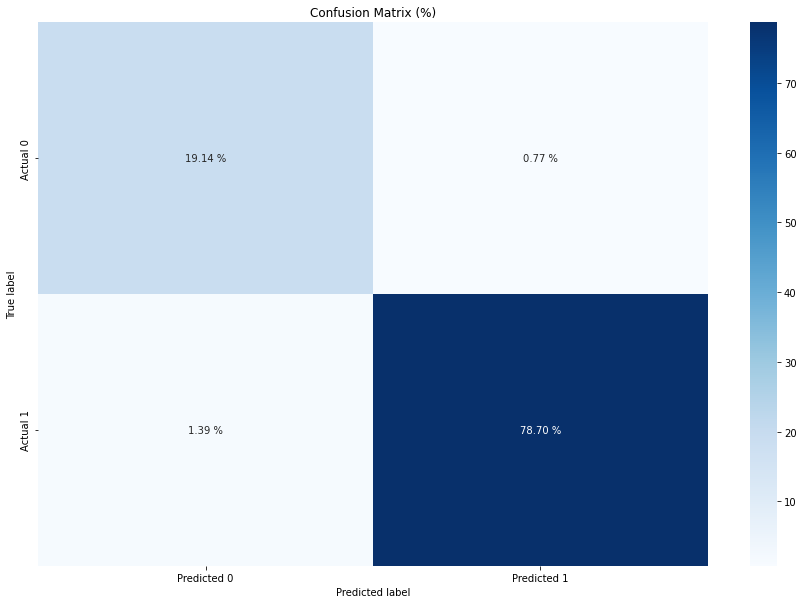

In [12]:
# Plotting the confusion matrix and ROC curve
svm_test_evaluation.plot_confusion_matrix()

ROC Curve

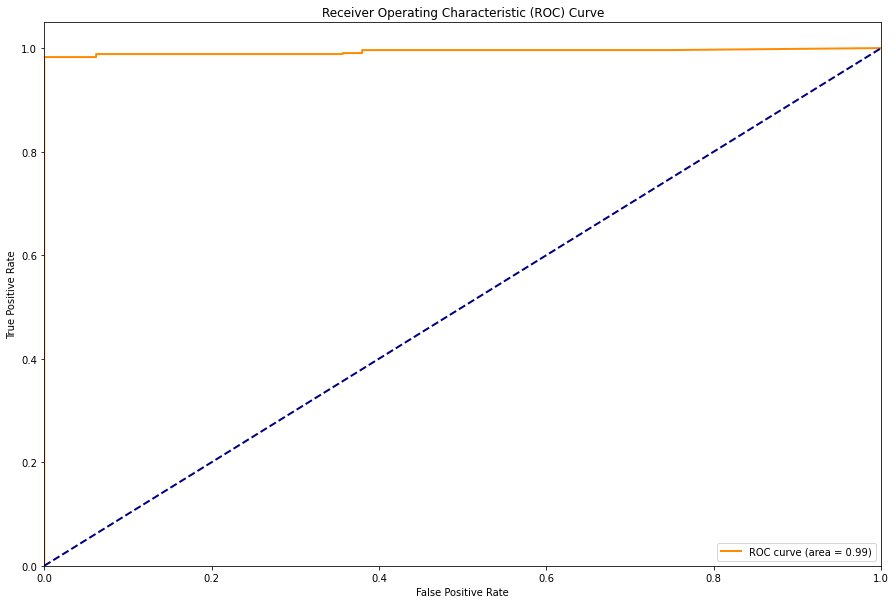

In [13]:
# Plot the ROC Cureve
svm_test_evaluation.plot_roc_curve()